<a id="TOP"> </a>
<div class="alert alert-box alert-info">
</div>

***

# EXPLORE

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Latex

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wrangle import clean_zillow, summarize, split_data_continuous
from viz import get_viz

import warnings
warnings.filterwarnings("ignore")

In [2]:
get_viz()


from viz import boxplots, hists, heatmaps, slicer, haversine
        


In [3]:
from viz import boxplots, hists, heatmaps, slicer, haversine

In [4]:
df = clean_zillow()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41067 entries, 0 to 41066
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    41067 non-null  int64  
 1   parcel                41067 non-null  int64  
 2   logerror              41067 non-null  float64
 3   bathrooms             41067 non-null  object 
 4   bedrooms              41067 non-null  object 
 5   tot_sqft              41067 non-null  float64
 6   fips                  41067 non-null  object 
 7   hot_tub               41067 non-null  float64
 8   lat                   41067 non-null  float64
 9   lon                   41067 non-null  float64
 10  lot_sqft              41067 non-null  float64
 11  pools                 41067 non-null  int64  
 12  county_landuse        41067 non-null  object 
 13  raw_tract_and_block   41067 non-null  float64
 14  city_id               41067 non-null  object 
 15  zip_code           

In [5]:
train, validate, test = split_data_continuous(df, with_baseline=True, target='rsle')

Prepared df: (41067, 25)

Train: (24639, 25)
Validate: (8214, 25)
Test: (8214, 25)
The mean_preds had the lowest RMSE: 447296 with an in/out of: 1.018


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24639 entries, 22185 to 21732
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    24639 non-null  int64  
 1   parcel                24639 non-null  int64  
 2   logerror              24639 non-null  float64
 3   bathrooms             24639 non-null  object 
 4   bedrooms              24639 non-null  object 
 5   tot_sqft              24639 non-null  float64
 6   fips                  24639 non-null  object 
 7   hot_tub               24639 non-null  float64
 8   lat                   24639 non-null  float64
 9   lon                   24639 non-null  float64
 10  lot_sqft              24639 non-null  float64
 11  pools                 24639 non-null  int64  
 12  county_landuse        24639 non-null  object 
 13  raw_tract_and_block   24639 non-null  float64
 14  city_id               24639 non-null  object 
 15  zip_code       

In [7]:
from modeling import model_sets

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24639 entries, 22185 to 21732
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    24639 non-null  int64  
 1   parcel                24639 non-null  int64  
 2   logerror              24639 non-null  float64
 3   bathrooms             24639 non-null  object 
 4   bedrooms              24639 non-null  object 
 5   tot_sqft              24639 non-null  float64
 6   fips                  24639 non-null  object 
 7   hot_tub               24639 non-null  float64
 8   lat                   24639 non-null  float64
 9   lon                   24639 non-null  float64
 10  lot_sqft              24639 non-null  float64
 11  pools                 24639 non-null  int64  
 12  county_landuse        24639 non-null  object 
 13  raw_tract_and_block   24639 non-null  float64
 14  city_id               24639 non-null  object 
 15  zip_code       

In [9]:
train.columns.to_list()

['id',
 'parcel',
 'logerror',
 'bathrooms',
 'bedrooms',
 'tot_sqft',
 'fips',
 'hot_tub',
 'lat',
 'lon',
 'lot_sqft',
 'pools',
 'county_landuse',
 'raw_tract_and_block',
 'city_id',
 'zip_code',
 'building_tax_value',
 'tax_value',
 'land_tax_value',
 'tax_amount',
 'tax_delinquency_flag',
 'tract_and_block',
 'half_baths',
 'house_age',
 'rsle',
 'baseline']

In [10]:
train[['bathrooms',
 'bedrooms',
 'tot_sqft',
 'fips',
 'hot_tub',
 'lot_sqft',
 'pools',
 'building_tax_value',
 'tax_value',
 'land_tax_value',
 'tax_amount',
 'tax_delinquency_flag',
 'half_baths',
 'house_age',
]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24639 entries, 22185 to 21732
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             24639 non-null  object 
 1   bedrooms              24639 non-null  object 
 2   tot_sqft              24639 non-null  float64
 3   fips                  24639 non-null  object 
 4   hot_tub               24639 non-null  float64
 5   lot_sqft              24639 non-null  float64
 6   pools                 24639 non-null  int64  
 7   building_tax_value    24639 non-null  float64
 8   tax_value             24639 non-null  float64
 9   land_tax_value        24639 non-null  float64
 10  tax_amount            24639 non-null  float64
 11  tax_delinquency_flag  24639 non-null  int64  
 12  half_baths            24639 non-null  int64  
 13  house_age             24639 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 3.3+ MB


In [11]:
df1 =df[['bathrooms',
 'bedrooms',
 'tot_sqft',
 'fips',
 'hot_tub',
 'lot_sqft',
 'pools',
 'building_tax_value',
 'tax_value',
 'land_tax_value',
 'tax_amount',
 'tax_delinquency_flag',
 'half_baths',
 'house_age',
         'rsle'
]]

In [12]:
df1.hot_tub = df1.hot_tub.astype('int')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41067 entries, 0 to 41066
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             41067 non-null  object 
 1   bedrooms              41067 non-null  object 
 2   tot_sqft              41067 non-null  float64
 3   fips                  41067 non-null  object 
 4   hot_tub               41067 non-null  int64  
 5   lot_sqft              41067 non-null  float64
 6   pools                 41067 non-null  int64  
 7   building_tax_value    41067 non-null  float64
 8   tax_value             41067 non-null  float64
 9   land_tax_value        41067 non-null  float64
 10  tax_amount            41067 non-null  float64
 11  tax_delinquency_flag  41067 non-null  int64  
 12  half_baths            41067 non-null  int64  
 13  house_age             41067 non-null  int64  
 14  rsle                  41067 non-null  float64
dtypes: float64(7), int6

In [14]:
df1 = pd.get_dummies(df1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41067 entries, 0 to 41066
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tot_sqft                 41067 non-null  float64
 1   hot_tub                  41067 non-null  int64  
 2   lot_sqft                 41067 non-null  float64
 3   pools                    41067 non-null  int64  
 4   building_tax_value       41067 non-null  float64
 5   tax_value                41067 non-null  float64
 6   land_tax_value           41067 non-null  float64
 7   tax_amount               41067 non-null  float64
 8   tax_delinquency_flag     41067 non-null  int64  
 9   half_baths               41067 non-null  int64  
 10  house_age                41067 non-null  int64  
 11  rsle                     41067 non-null  float64
 12  bathrooms__1_            41067 non-null  uint8  
 13  bathrooms__2_            41067 non-null  uint8  
 14  bathrooms__3_         

In [15]:
df1 = df1.drop(columns= ['bathrooms__5_', 'bedrooms__5_'])

In [16]:
df1.columns

Index(['tot_sqft', 'hot_tub', 'lot_sqft', 'pools', 'building_tax_value',
       'tax_value', 'land_tax_value', 'tax_amount', 'tax_delinquency_flag',
       'half_baths', 'house_age', 'rsle', 'bathrooms__1_', 'bathrooms__2_',
       'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_',
       'bedrooms__4_', 'fips_Los Angeles County', 'fips_Orange County',
       'fips_Ventura County'],
      dtype='object')

In [19]:
df1.columns = ['tot_sqft', 'hot_tub', 'lot_sqft', 'pools', 'building_tax_value',
       'tax_value', 'land_tax_value', 'tax_amount', 'tax_delinquency_flag',
       'half_baths', 'house_age', 'rsle', 'bathrooms__1_', 'bathrooms__2_',
       'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_',
       'bedrooms__4_', 'Los Angeles County', 'Orange County',
       'Ventura County']

In [20]:
df1 = df1.drop(columns= 'Los Angeles County')

In [21]:
train, validate, test = split_data_continuous(df1, with_baseline=True, target= 'rsle')

Prepared df: (41067, 21)

Train: (24639, 21)
Validate: (8214, 21)
Test: (8214, 21)
The mean_preds had the lowest RMSE: 447296 with an in/out of: 1.018


In [22]:
from modeling import scale_data

In [23]:
train_unscaled, validate_unscaled, test_unscaled = train, validate, test

In [24]:
train, validate, test = scale_data(train, validate, test)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24639 entries, 22185 to 21732
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tot_sqft              24639 non-null  float64
 1   hot_tub               24639 non-null  float64
 2   lot_sqft              24639 non-null  float64
 3   pools                 24639 non-null  float64
 4   building_tax_value    24639 non-null  float64
 5   tax_value             24639 non-null  float64
 6   land_tax_value        24639 non-null  float64
 7   tax_amount            24639 non-null  float64
 8   tax_delinquency_flag  24639 non-null  float64
 9   half_baths            24639 non-null  float64
 10  house_age             24639 non-null  float64
 11  rsle                  24639 non-null  float64
 12  bathrooms__1_         24639 non-null  float64
 13  bathrooms__2_         24639 non-null  float64
 14  bathrooms__3_         24639 non-null  float64
 15  bathrooms__4_  

In [60]:
# X_train, y_train, x_validate, y_validate, X_test, y_test =\
# model_sets(train, validate, test, target= 'rsle', with_baseline=True)


X_cols = ['tot_sqft', 'hot_tub', 'lot_sqft', 'pools', 'building_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', 'tax_delinquency_flag', 'half_baths', 'house_age', 'bathrooms__1_', 'bathrooms__2_', 'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_', 'bedrooms__4_', 'Los Angeles County', 'Orange County', 'Ventura County']

y_cols = ['rsle', 'baseline']




In [26]:
X_cols = ['tot_sqft', 'hot_tub', 'lot_sqft', 'pools', 'building_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', 'tax_delinquency_flag', 'half_baths', 'house_age', 'bathrooms__1_', 'bathrooms__2_', 'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_', 'bedrooms__4_', 'Orange County', 'Ventura County']

y_cols = ['rsle', 'baseline']

In [63]:
# train = pd.concat([X_train, y_train], axis=1)

In [27]:
train.rsle.describe()

count    24639.000000
mean         0.014296
std          0.031527
min          0.000000
25%          0.002840
50%          0.006527
75%          0.013979
max          1.000000
Name: rsle, dtype: float64

In [28]:
from sklearn.cluster import KMeans


In [29]:
# for i, j in enumerate(X_cols):
#     for k in range(i+1, len(X_cols)):
        
#         double_var = [j, X_cols[k], 'rsle']
#         print(double_var)

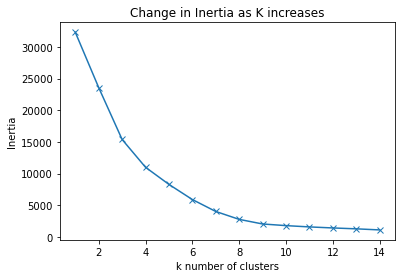

['tot_sqft', 'bathrooms__1_', 'bathrooms__2_', 'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_', 'bedrooms__4_', 'tax_value']


What is the Elbow?  7


The elbow is 7
KMeans(n_clusters=7)


In [30]:
double_var= ['tot_sqft', 'bathrooms__1_', 'bathrooms__2_', 'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_', 'bedrooms__4_', 'tax_value']

inertia_series = pd.Series(
            {k: KMeans(k).fit(train[double_var]).inertia_
            for k in range(1,15)})
        
inertia_series.plot(marker='x')
plt.ylabel('Inertia')
plt.xlabel('k number of clusters')
plt.title('Change in Inertia as K increases')
plt.show()
print(double_var)

elbow = input('What is the Elbow? ')
elbow = int(elbow)
print(f'The elbow is {elbow}')

kmeans = KMeans(elbow).fit(train[double_var])
# kmeans = KMeans(8).fit(train[double_var])
print(kmeans)
train['clusters'] = kmeans.predict(train[double_var])

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24639 entries, 22185 to 21732
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tot_sqft              24639 non-null  float64
 1   hot_tub               24639 non-null  float64
 2   lot_sqft              24639 non-null  float64
 3   pools                 24639 non-null  float64
 4   building_tax_value    24639 non-null  float64
 5   tax_value             24639 non-null  float64
 6   land_tax_value        24639 non-null  float64
 7   tax_amount            24639 non-null  float64
 8   tax_delinquency_flag  24639 non-null  float64
 9   half_baths            24639 non-null  float64
 10  house_age             24639 non-null  float64
 11  rsle                  24639 non-null  float64
 12  bathrooms__1_         24639 non-null  float64
 13  bathrooms__2_         24639 non-null  float64
 14  bathrooms__3_         24639 non-null  float64
 15  bathrooms__4_  

In [32]:
train.columns

Index(['tot_sqft', 'hot_tub', 'lot_sqft', 'pools', 'building_tax_value',
       'tax_value', 'land_tax_value', 'tax_amount', 'tax_delinquency_flag',
       'half_baths', 'house_age', 'rsle', 'bathrooms__1_', 'bathrooms__2_',
       'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_',
       'bedrooms__4_', 'Orange County', 'Ventura County', 'baseline',
       'clusters'],
      dtype='object')

In [33]:
train_unscaled.columns

Index(['tot_sqft', 'hot_tub', 'lot_sqft', 'pools', 'building_tax_value',
       'tax_value', 'land_tax_value', 'tax_amount', 'tax_delinquency_flag',
       'half_baths', 'house_age', 'rsle', 'bathrooms__1_', 'bathrooms__2_',
       'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_',
       'bedrooms__4_', 'Orange County', 'Ventura County', 'baseline'],
      dtype='object')

In [36]:
X_train = train[['tot_sqft', 'hot_tub', 'lot_sqft', 'pools', 'building_tax_value',
       'tax_value', 'land_tax_value', 'tax_amount', 'tax_delinquency_flag',
       'half_baths', 'house_age', 'bathrooms__1_', 'bathrooms__2_',
       'bathrooms__3_', 'bathrooms__4_', 'bedrooms__2_', 'bedrooms__3_',
       'bedrooms__4_', 'Orange County', 'Ventura County',
       'clusters']]

In [37]:
y_train = train[['rsle', 'baseline']]

In [38]:
train_unscaled['clusters'] = train.clusters

In [40]:
train_unscaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24639 entries, 22185 to 21732
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tot_sqft              24639 non-null  float64
 1   hot_tub               24639 non-null  int64  
 2   lot_sqft              24639 non-null  float64
 3   pools                 24639 non-null  int64  
 4   building_tax_value    24639 non-null  float64
 5   tax_value             24639 non-null  float64
 6   land_tax_value        24639 non-null  float64
 7   tax_amount            24639 non-null  float64
 8   tax_delinquency_flag  24639 non-null  int64  
 9   half_baths            24639 non-null  int64  
 10  house_age             24639 non-null  int64  
 11  rsle                  24639 non-null  float64
 12  bathrooms__1_         24639 non-null  uint8  
 13  bathrooms__2_         24639 non-null  uint8  
 14  bathrooms__3_         24639 non-null  uint8  
 15  bathrooms__4_  

In [44]:
le_per_cluster = train[['tax_value', 'rsle', 'clusters']].groupby('clusters').agg(
['min', 'max', 'median', 'std', 'mean']).reset_index()

le_per_cluster.columns = ['_'.join(column) for column in le_per_cluster.columns.to_flat_index()]

le_per_cluster.columns

Index(['clusters_', 'tax_value_min', 'tax_value_max', 'tax_value_median',
       'tax_value_std', 'tax_value_mean', 'rsle_min', 'rsle_max',
       'rsle_median', 'rsle_std', 'rsle_mean'],
      dtype='object')

In [47]:
le_per_cluster.columns = ['clusters', 'tax_value_min', 'tax_value_max', 'tax_value_median',
       'tax_value_std', 'tax_value_mean', 'rsle_min', 'rsle_max',
       'rsle_median', 'rsle_std', 'rsle_mean']

In [45]:
city = train_unscaled

In [ ]:
city['cluster_house_count'] = 1
city_county = city[['clusters', 'fips', 'zip_code_count']]\
.groupby('zip_code').agg({'fips':'first', 'zip_code_count': 'count'})
city_county = city_county.reset_index()

city_county.columns = ['zip_code_check', 'county', 'house_count']
city_county

le_per_zip = pd.concat([le_per_zip, city_county], axis=1)
le_per_zip.drop(columns='zip_code_check', inplace=True)
le_per_zip

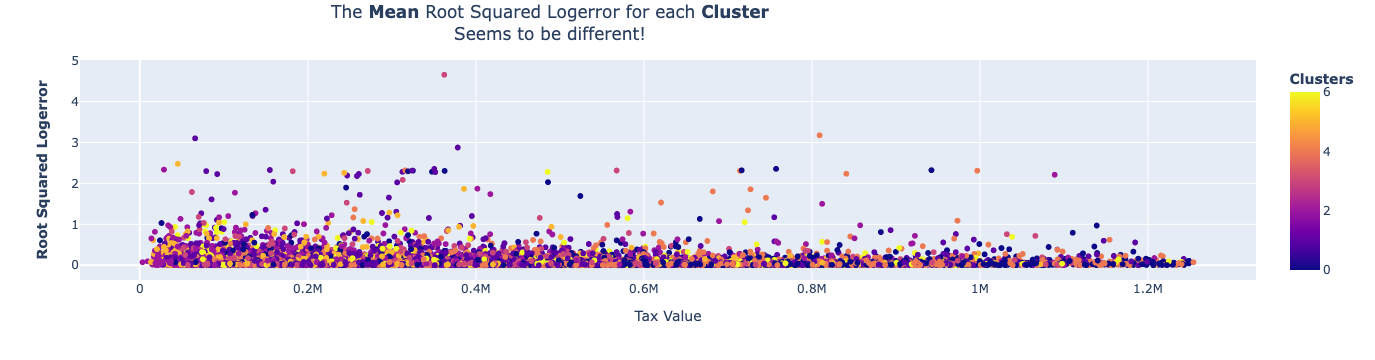

In [54]:
fig_rsle_by_cluster = px.scatter(data_frame= train_unscaled,
           x= 'tax_value',
           y= 'rsle',
           color= 'clusters',
           # size= 'house_count',
           labels= {'clusters': '<b>Clusters</b>'
                   ,'rsle': '<b>Root Squared Logerror</b>'
                   ,'tax_value': 'Tax Value'}
          )

fig_rsle_by_cluster.update_layout(title= {'text': 'The <b>Mean</b> Root Squared Logerror for each <b>Cluster</b><br>\
Seems to be different!',
                 'x': .4,
                 'y': .95,
                 'xanchor': 'center',
                 'yanchor': 'top'})
fig_rsle_by_cluster.show()

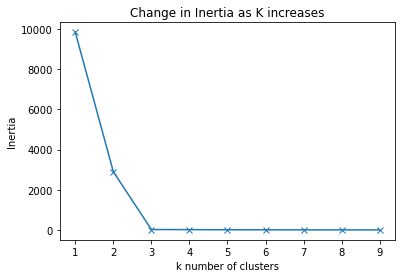

['bedrooms__2_', 'bedrooms__3_', 'rsle']


In [86]:
double_var= ['bedrooms__2_', 'bedrooms__3_', 'rsle']

inertia_series = pd.Series(
            {k: KMeans(k).fit(train[double_var]).inertia_
            for k in range(1,10)})
        
inertia_series.plot(marker='x')
plt.ylabel('Inertia')
plt.xlabel('k number of clusters')
plt.title('Change in Inertia as K increases')
plt.show()
print(double_var)

# FINAL CELL
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>